# Election Data Analysis
## This data from the 2012 election.

**Questions:**
1. Who was being polled and what was their party affiliation?
2. Did the poll results favor Romney or Obama?
3. How do undecided voters effect the poll?
4. Can we account for the undecided voters?
5. How did voter sentiment change over time?
6. Can we see an effect in the polls from the debates?

## Import libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':[6, 6]}, font_scale = 1.2)

The data of polls will be obtained from HuffPost Pollster. 

We will also be using StringIO to work with csv data we got from HuffPost.

In [6]:
import requests
from io import StringIO

## Import data from HuffPost

In [7]:
url = 'http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'
source = requests.get(url).text
poll_data = StringIO(source)

df_poll = pd.read_csv(poll_data)
df_poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [8]:
df_poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                586 non-null    object 
 1   Start Date              586 non-null    object 
 2   End Date                586 non-null    object 
 3   Entry Date/Time (ET)    586 non-null    object 
 4   Number of Observations  564 non-null    float64
 5   Population              586 non-null    object 
 6   Mode                    586 non-null    object 
 7   Obama                   586 non-null    float64
 8   Romney                  586 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            586 non-null    object 
 12  Source URL              584 non-null    object 
 13  Partisan                586 non-null    object 
 14  Affiliation             586 non-null    ob

In [9]:
df_poll['Affiliation'].unique()

array(['None', 'Rep', 'Dem', 'Other'], dtype=object)

In [10]:
df_poll['Affiliation'].value_counts()

None     480
Dem       93
Rep        9
Other      4
Name: Affiliation, dtype: int64

<AxesSubplot:xlabel='Affiliation', ylabel='count'>

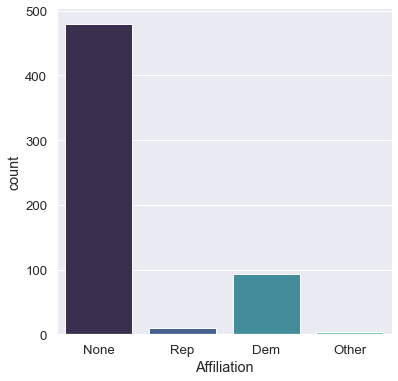

In [11]:
sns.countplot(x = 'Affiliation', data = df_poll, palette='mako')

**Notes:**
* There are 3 types of data in this column (['None', 'Rep', 'Dem', 'Other']).
* None ones are the most common they don't have affiliation which is good.
* There is a quite large amount of polls that have a democrat affiliation.
* We need to keep in mind that there is large amount of democrat than republicans.

In [12]:
df_poll['Population'].unique()

array(['Likely Voters', 'Registered Voters', 'Adults',
       'Likely Voters - Republican'], dtype=object)

In [13]:
df_poll['Population'].value_counts()

Likely Voters                 292
Registered Voters             252
Adults                         41
Likely Voters - Republican      1
Name: Population, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Population'>

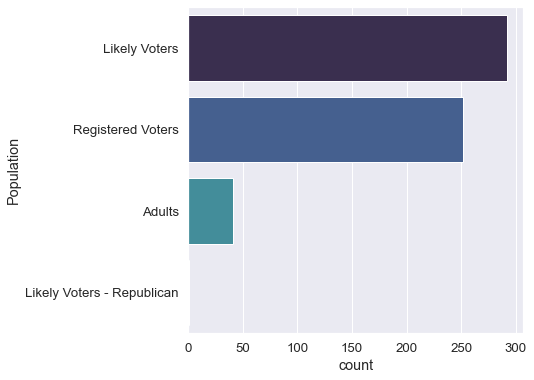

In [14]:
sns.countplot(y = 'Population', data = df_poll, palette='mako')

**Notes:**
* Likely Voters are slightly large than Registered Voters.
* There is small amount of adult.
* And there is no Likely Voters - Republican.

If we plot Affiliation with Population to see the difference.

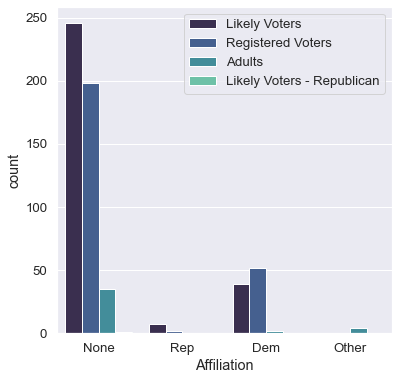

In [15]:
sns.countplot(x = 'Affiliation', data = df_poll, hue = 'Population', palette='mako')
plt.legend(loc='upper right')

**Notes:**
* Much of population have no affiliation and that makes sense cuz the most common polls we have in our data have none affiliation.

In [16]:
df_poll.describe()[['Obama', 'Romney', 'Undecided']].T

,count,mean,std,min,25%,50%,75%,max
Obama,586.0,46.805461,2.422058,37.0,45.0,47.0,48.00,54.0
Romney,586.0,44.614334,2.906180,32.0,43.0,45.0,46.75,53.0
Undecided,423.0,6.550827,3.701754,1.0,4.0,6.0,8.00,28.0


In [17]:
df_poll.describe()['Obama']['mean']

46.80546075085324

In [18]:
avg_df = pd.DataFrame(df_poll[['Obama', 'Romney', 'Undecided']].mean())
std_df = pd.DataFrame(df_poll[['Obama', 'Romney', 'Undecided']].std())

<AxesSubplot:>

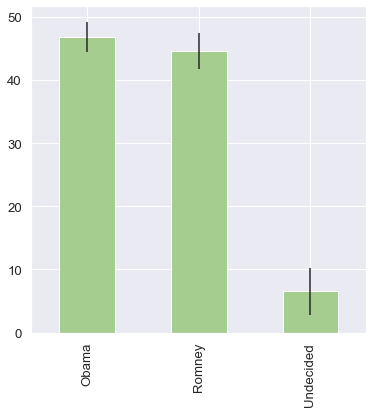

In [19]:
avg_df.plot(yerr = std_df, kind = 'bar', legend = False, colormap = 'crest')

**Notes:**
* Obama and Romney was almost near to each other.
* No. of Undecided can be influencing it can make a big difference in this poll.

In [20]:
avg_std = pd.concat([avg_df, std_df], axis = 1)
avg_std.columns = ['Average', 'STD']
avg_std

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754


**Notes:**
* If we look at numbers and from above diagrams it looks like poll indecates it's fairly close race.
* But what about undecided voters?!

### Let's s do a quick time series analysis of voter sentiment

In [21]:
df_poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


<AxesSubplot:xlabel='End Date'>

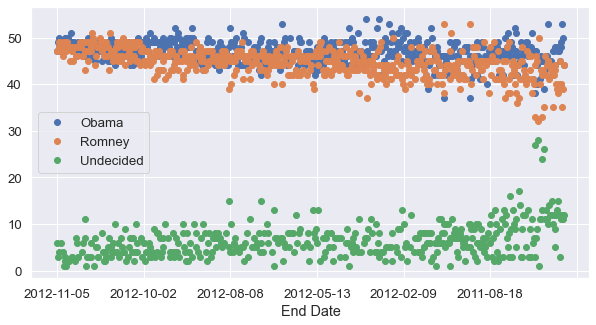

In [26]:
df_poll.plot(x = 'End Date', y = ['Obama', 'Romney', 'Undecided'], linestyle = '', marker = 'o', figsize=(10,5))

**Notes:**
1. If u look at this plot we will see that the undecided voters become less on the time series change.
2. The more we go in time the difference between Obama and Romney become small.

We will see better vizualization of Obama Vs Romney in Time Series

In [27]:
df_poll['Difference'] = (df_poll.Obama - df_poll.Romney) / 100
df_poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,https://elections.huffingtonpost.com/pollster/...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,https://elections.huffingtonpost.com/pollster/...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


**Note:** The positive percentage indecates to Obama and negative to Romney.

In [35]:
df_diff = df_poll.groupby('Start Date', as_index=False).mean()
df_diff = df_diff[['Start Date', 'Number of Observations', 'Obama', 'Romney', 'Undecided', 'Difference']]
df_diff.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,0.09


<AxesSubplot:xlabel='Start Date'>

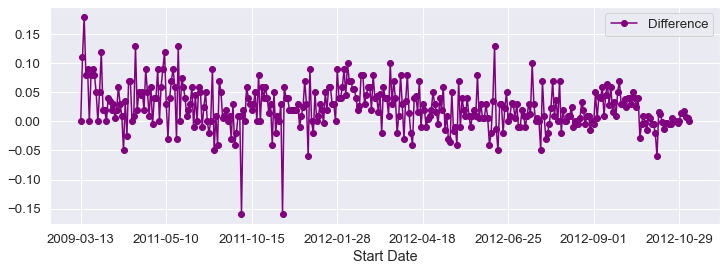

In [40]:
df_diff.plot(x = 'Start Date', y = 'Difference', figsize = (12,4), linestyle = '-', marker = 'o', color = 'purple')

**Notes:**
1. We will notice that Obama was wining most of the time in the votes.
2. And they get close in the end of time series.
3. In 2 particular dates Romney wins hard and that means that there is something in those 2 dates.